In [1]:
#####欠采样cut=4######
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("train10.csv",index_col=None)
df = df.drop(columns=["Unnamed: 0","depmap_id","drugname1","drugname2","drug1","drug2","cell line","score","seneitive10","drug_combination","cancer"])
#R1之后做特征集筛选删除mut数据#
df = df.loc[:, ~df.columns.str.startswith('mut_')]
X = df.drop(columns=["cut4"])
y = df["cut4"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)

#数据分割与建模#
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#欠采样后数据集划分
print('原始分类情况：{}'.format(Counter(y)))
model_RandomUnderSampler = RandomUnderSampler(sampling_strategy=0.5)
x_resampled, y_resampled =model_RandomUnderSampler.fit_resample(X,y) 
print('随机欠采样后的分类情况：{}'.format(Counter(y_resampled)))
X_train,X_test,y_train,y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=22)

原始分类情况：Counter({0: 114074, 1: 14371})
随机欠采样后的分类情况：Counter({0: 28742, 1: 14371})


logistic

Best accuracy: 0.7367642795013046
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7413893076655457
Precision: 0.6669879518072289
Recall: 0.4734861443722203
F1 Score: 0.5538215286114445
混淆矩阵: [[5009  691]
 [1539 1384]]
Logistic Regression AUC: 0.7766761498340446


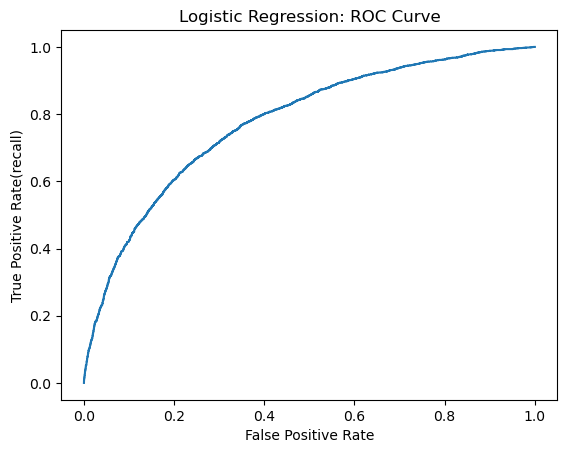

Logistic Regression AUPR: 0.6420199718664694


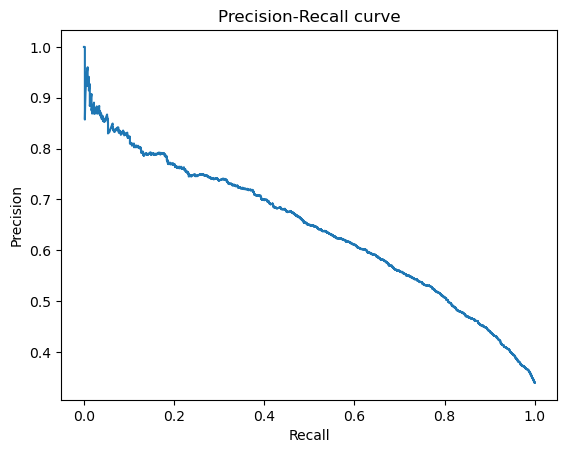

In [2]:
#Logistic#
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #不平衡处理
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
logreg = LogisticRegression(**best_params)
logreg.fit(X_train, y_train.astype('int'))

LRpredictions = logreg.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LRpredictions))
print("Precision:",precision_score(y_test,LRpredictions))
print("Recall:",recall_score(y_test,LRpredictions))
print("F1 Score:",f1_score(y_test,LRpredictions))
print("混淆矩阵:",confusion_matrix(y_test,LRpredictions))

y_score = logreg.fit(X_train,y_train).predict_proba(X_test)
LR_fpr,LR_tpr,thresholds=roc_curve(y_test, y_score[:,1])
LR_auc =auc(LR_fpr,LR_tpr)
print("Logistic Regression AUC:",LR_auc)
plt.plot(LR_fpr,LR_tpr)
plt.title("Logistic Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LR_precision, LR_recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
LR_aupr = auc(LR_recall, LR_precision)
print("Logistic Regression AUPR:", LR_aupr)
plt.plot(LR_recall, LR_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [3]:
import joblib
joblib.dump(logreg, "models/logistic2.pkl")

['models/logistic2.pkl']

lasso

Best accuracy: 0.7359814438967817
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7409254319842282
Precision: 0.6666666666666666
Recall: 0.4714334587752309
F1 Score: 0.5523046092184369
混淆矩阵: [[5011  689]
 [1545 1378]]
Lasso Regression AUC: 0.7750576492548512


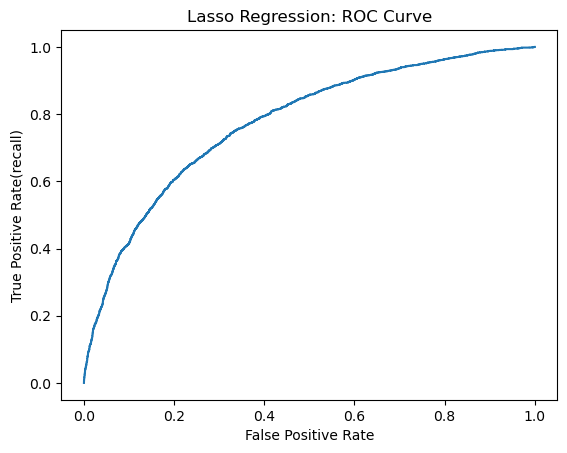

Logistic Regression AUPR: 0.6409921192623484


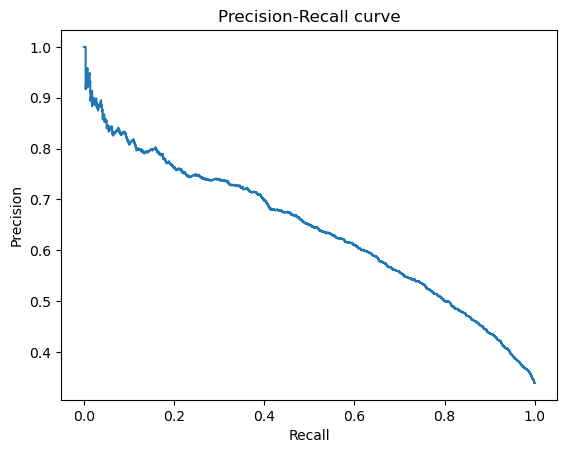

In [4]:
#lasso#
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

lasso = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #不平衡处理
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
lasso = LogisticRegression(**best_params)
lasso.fit(X_train, y_train.astype('int'))

LApredictions = lasso.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LApredictions))
print("Precision:",precision_score(y_test,LApredictions))
print("Recall:",recall_score(y_test,LApredictions))
print("F1 Score:",f1_score(y_test,LApredictions))
print("混淆矩阵:",confusion_matrix(y_test,LApredictions))

y_score = lasso.fit(X_train,y_train).predict_proba(X_test)
LA_fpr,LA_tpr,LA_thresholds=roc_curve(y_test, y_score[:,1])
LA_auc =auc(LA_fpr,LA_tpr)
print("Lasso Regression AUC:",LA_auc)
plt.plot(LA_fpr,LA_tpr)
plt.title("Lasso Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LA_precision, LA_recall, LA_thresholds = precision_recall_curve(y_test, y_score[:,1])
LA_aupr = auc(LA_recall, LA_precision)
print("Logistic Regression AUPR:", LA_aupr)
plt.plot(LA_recall, LA_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [5]:
import joblib
joblib.dump(lasso, "models/lasso2.pkl")

['models/lasso2.pkl']

RF

Best accuracy: 0.7626848361844012
Best parameters: {'max_depth': 11, 'max_features': 9, 'n_estimators': 150}
Accuracy: 0.7735126985967761
Precision: 0.7990135635018496
Recall: 0.4433800889497092
F1 Score: 0.5702970297029702
混淆矩阵: [[5374  326]
 [1627 1296]]
Random Forest AUC: 0.8114327385346707


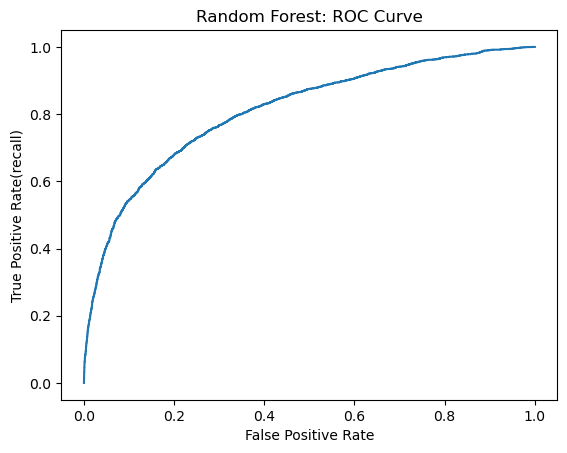

Logistic Regression AUPR: 0.7197033365062293


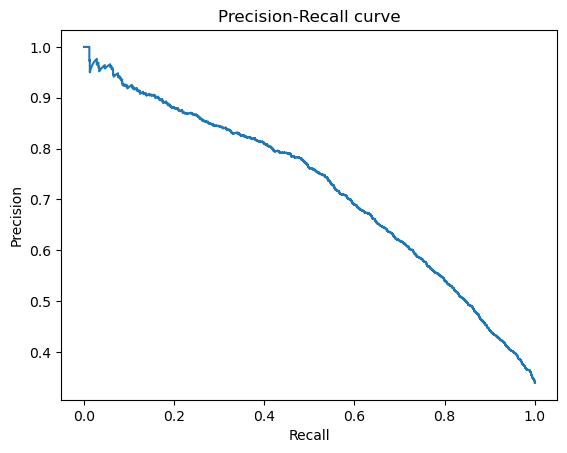

In [7]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3,5,7,9,11],
    'max_features':np.arange(5,11,2),
  
}

rfc = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #不平衡处理
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
rfc = RandomForestClassifier(**best_params)
rfc.fit(X_train, y_train.astype('int'))

RFpredictions = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,RFpredictions))
print("Precision:",precision_score(y_test,RFpredictions))
print("Recall:",recall_score(y_test,RFpredictions))
print("F1 Score:",f1_score(y_test,RFpredictions))
print("混淆矩阵:",confusion_matrix(y_test,RFpredictions))

y_score = rfc.fit(X_train,y_train).predict_proba(X_test)
RF_fpr,RF_tpr,RF_thresholds=roc_curve(y_test, y_score[:,1])
RF_auc =auc(RF_fpr,RF_tpr)
print("Random Forest AUC:",RF_auc)
plt.plot(RF_fpr,RF_tpr)
plt.title("Random Forest: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

RF_precision, RF_recall, RF_thresholds = precision_recall_curve(y_test, y_score[:,1])
RF_aupr = auc(RF_recall, RF_precision)
print("Logistic Regression AUPR:", RF_aupr)
plt.plot(RF_recall, RF_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [11]:
import joblib
joblib.dump(rfc, "models/rfc2.pkl")

['models/rfc2.pkl']

svm

Best accuracy: 0.7821687445636416
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7932274150527658
Precision: 0.7332242225859247
Recall: 0.6130687649674992
F1 Score: 0.6677846096515744
混淆矩阵: [[5048  652]
 [1131 1792]]
SVM AUC: 0.8404638349208635


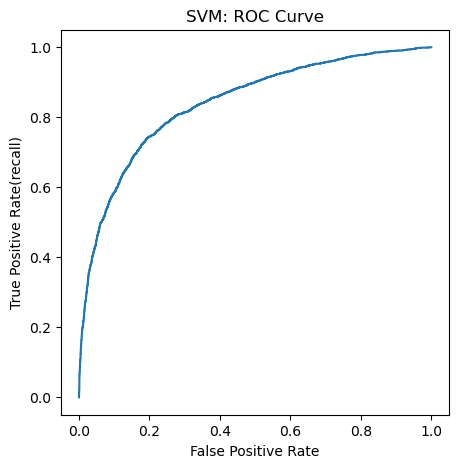

Logistic Regression AUPR: 0.754608469111991


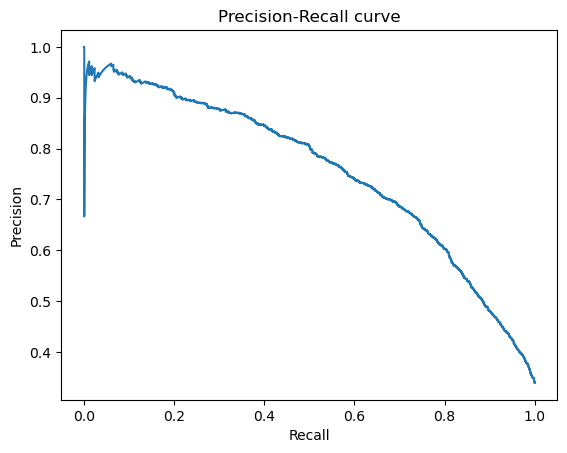

In [8]:
param_grid = {
    'C': [1,5,10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
svm = SVC(**best_params)
svm.fit(X_train, y_train.astype('int'))

SVMpredictions = svm.predict(X_test)
print("Accuracy:",accuracy_score(y_test,SVMpredictions))
print("Precision:",precision_score(y_test,SVMpredictions))
print("Recall:",recall_score(y_test,SVMpredictions))
print("F1 Score:",f1_score(y_test,SVMpredictions))
print("混淆矩阵:",confusion_matrix(y_test,SVMpredictions))

y_score = svm.fit(X_train,y_train).decision_function(X_test)
plt.figure(figsize=(5,5))
SVM_fpr,SVM_tpr,SVM_thresholds=roc_curve(y_test, y_score)
SVM_auc =auc(SVM_fpr,SVM_tpr)
print("SVM AUC:",SVM_auc)
plt.plot(SVM_fpr,SVM_tpr)
plt.title("SVM: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

SVM_precision, SVM_recall, SVM_thresholds = precision_recall_curve(y_test, y_score)
SVM_aupr = auc(SVM_recall, SVM_precision)
print("Logistic Regression AUPR:", SVM_aupr)
plt.plot(SVM_recall, SVM_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [9]:
import joblib
joblib.dump(svm, "models/svm2.pkl")

['models/svm2.pkl']

xgboost

Best accuracy: 0.8008988112496376
Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 700}
Accuracy: 0.8095790328192044
Precision: 0.7658779576587795
Recall: 0.6312008210742388
F1 Score: 0.6920480120030007
混淆矩阵: [[5136  564]
 [1078 1845]]
XGbooost_auc: 0.8632818361332685


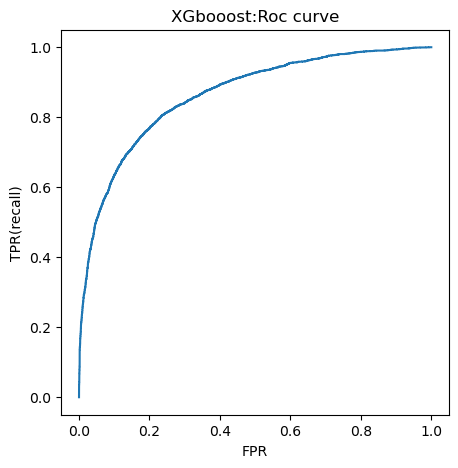

Logistic Regression AUPR: 0.7896951621655808


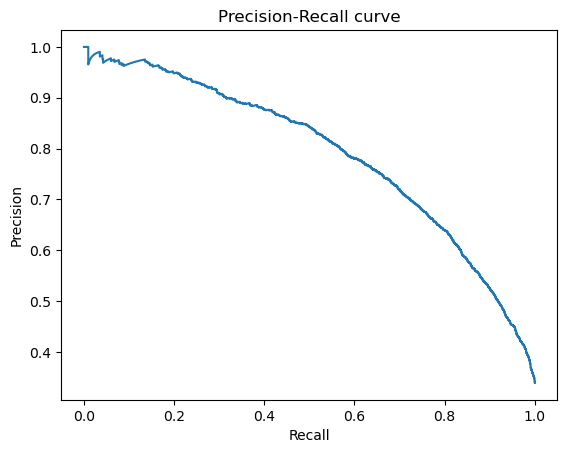

In [10]:
param_grid = {
    'min_child_weight': [1, 2, 3],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [7, 9,11],
    'n_estimators': [300,500,700]
}
xgb = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)

print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train.astype('int'))
XBpredictions = xgb.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("Logistic Regression AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [12]:
import joblib
joblib.dump(xgb, "models/xgboost2.pkl")

['models/xgboost2.pkl']

合并

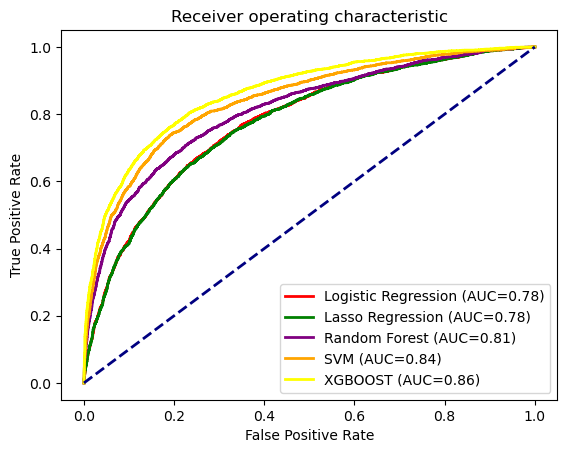

In [13]:
plt.plot(LR_fpr, LR_tpr, color='red', lw=2, label='Logistic Regression (AUC=%0.2f)' % LR_auc)
plt.plot(LA_fpr, LA_tpr, color='green', lw=2, label='Lasso Regression (AUC=%0.2f)' % LA_auc)
plt.plot(RF_fpr, RF_tpr, color='purple', lw=2, label='Random Forest (AUC=%0.2f)' % RF_auc)
plt.plot(SVM_fpr, SVM_tpr, color='orange', lw=2, label='SVM (AUC=%0.2f)' % SVM_auc)
plt.plot(XB_fpr, XB_tpr, color='yellow', lw=2, label='XGBOOST (AUC=%0.2f)' % XB_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

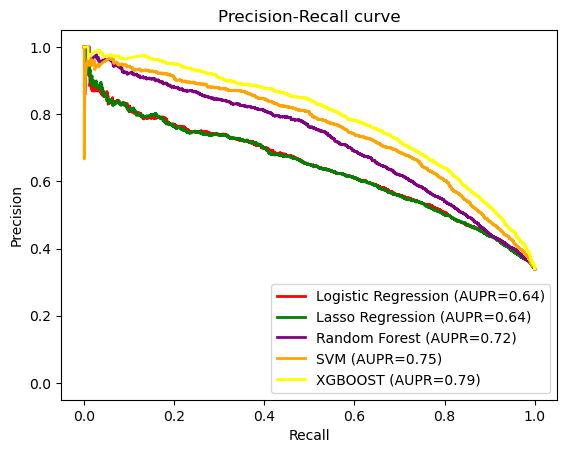

In [14]:
plt.plot(LR_recall, LR_precision, color='red', lw=2, label='Logistic Regression (AUPR=%0.2f)' % LR_aupr)
plt.plot(LA_recall, LA_precision, color='green', lw=2, label='Lasso Regression (AUPR=%0.2f)' % LA_aupr)
plt.plot(RF_recall, RF_precision, color='purple', lw=2, label='Random Forest (AUPR=%0.2f)' % RF_aupr)
plt.plot(SVM_recall, SVM_precision, color='orange', lw=2, label='SVM (AUPR=%0.2f)' % SVM_aupr)
plt.plot(XB_recall, XB_precision, color='yellow', lw=2, label='XGBOOST (AUPR=%0.2f)' % XB_aupr)

#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()